Load the data

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
# import fiona
from bs4 import BeautifulSoup

In [5]:
import os
import pykml

In [6]:
os.chdir("./Dataset")

In [7]:
from pykml import parser

In [8]:
with open("Building_Footprint.kml",'r', encoding="utf-8") as f:
    root = parser.parse(f).getroot()
    
places = []
for place in root.Document.Folder.Placemark:
    data = {item.get("name"):item.text for item in place.ExtendedData.SchemaData.SimpleData}
    coords = place.MultiGeometry.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
    data["Coordinates"] = coords
    places.append(data)
    
df = pd.DataFrame(places)
df.head() 

,tessellate,extrude,visibility,id,fid,layer,path,Coordinates
0,-1,0,-1,cugir009034.3,7624,clip_Bronx,/Users/killo/Desktop/Clip_Bronx.kml|layername=...,"-73.919029,40.848199 -73.919329,40.847953 -73...."
1,-1,0,-1,cugir009034.4,7625,clip_Bronx,/Users/killo/Desktop/Clip_Bronx.kml|layername=...,"-73.921952,40.849629 -73.921911,40.849679 -73...."
2,-1,0,-1,cugir009034.5,7626,clip_Bronx,/Users/killo/Desktop/Clip_Bronx.kml|layername=...,"-73.920502,40.850113 -73.920453,40.850167 -73...."
3,-1,0,-1,cugir009034.6,7627,clip_Bronx,/Users/killo/Desktop/Clip_Bronx.kml|layername=...,"-73.92056,40.851403 -73.920531,40.851445 -73.9..."
4,-1,0,-1,cugir009034.142,7829,clip_Bronx,/Users/killo/Desktop/Clip_Bronx.kml|layername=...,"-73.912343,40.852184 -73.912472,40.852098 -73...."


In [9]:
df.tail()

,tessellate,extrude,visibility,id,fid,layer,path,Coordinates
9431,-1,0,-1,cugir009062.5858,4806054,clip_Manhattan,/Users/killo/Desktop/Clip_Manhattan.kml|layern...,"-73.952668,40.779232 -73.95254,40.779428 -73.9..."
9432,-1,0,-1,cugir009062.5859,4806055,clip_Manhattan,/Users/killo/Desktop/Clip_Manhattan.kml|layern...,"-73.949638,40.776133 -73.949312,40.776674 -73...."
9433,-1,0,-1,cugir009062.5860,4806056,clip_Manhattan,/Users/killo/Desktop/Clip_Manhattan.kml|layern...,"-73.952102,40.768802 -73.951738,40.769309 -73...."
9434,-1,0,-1,cugir009062.5861,4806068,clip_Manhattan,/Users/killo/Desktop/Clip_Manhattan.kml|layern...,"-73.952297,40.75904 -73.952463,40.759083 -73.9..."
9435,-1,0,-1,cugir009062.5862,4806069,clip_Manhattan,/Users/killo/Desktop/Clip_Manhattan.kml|layern...,"-73.955791,40.763136 -73.956023,40.763121 -73...."


In [10]:
import os
os.getcwd()

'd:\\EY Data Challenge 2025\\Dataset'

In [15]:
from PIL import Image
im = Image.open("S2_sample.tiff")
im_array = np.array(im)
im_array

UnidentifiedImageError: cannot identify image file 'S2_sample.tiff'

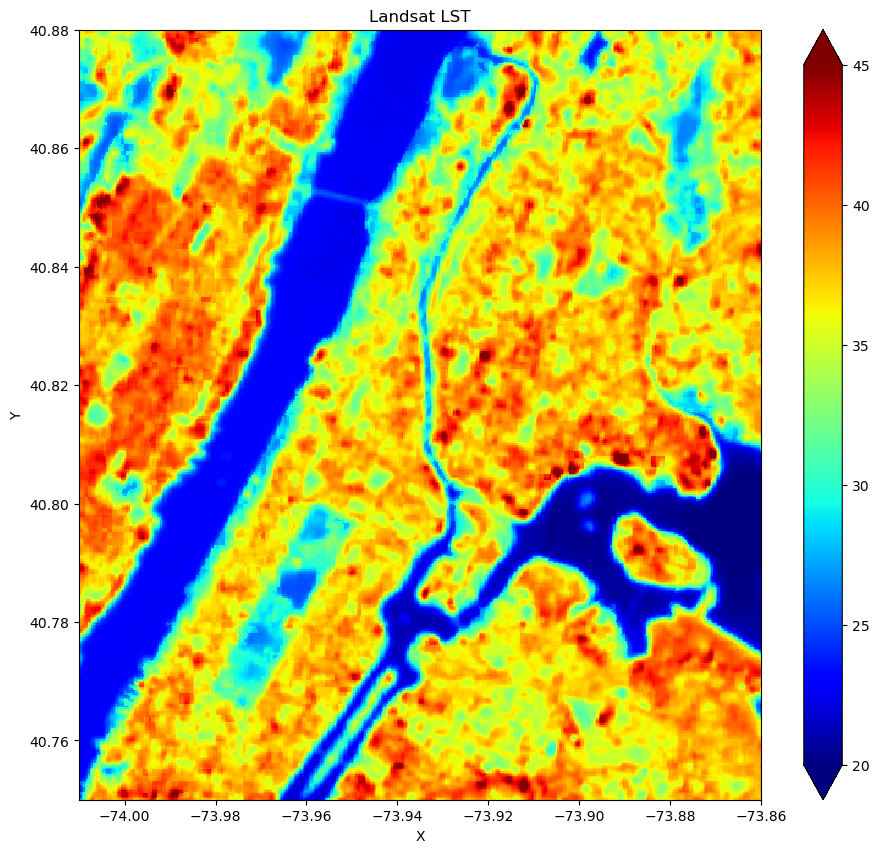

In [18]:
import rioxarray as rxr

import matplotlib.pyplot as plt

# Load the 'Landsat_LST.tiff' file
lst = rxr.open_rasterio("Landsat_LST.tiff", masked=True).squeeze()

# Plot the loaded data
plt.figure(figsize=(11, 10))
lst.plot(vmin = 20.0, vmax = 45.0,cmap='jet')
plt.title('Landsat LST')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

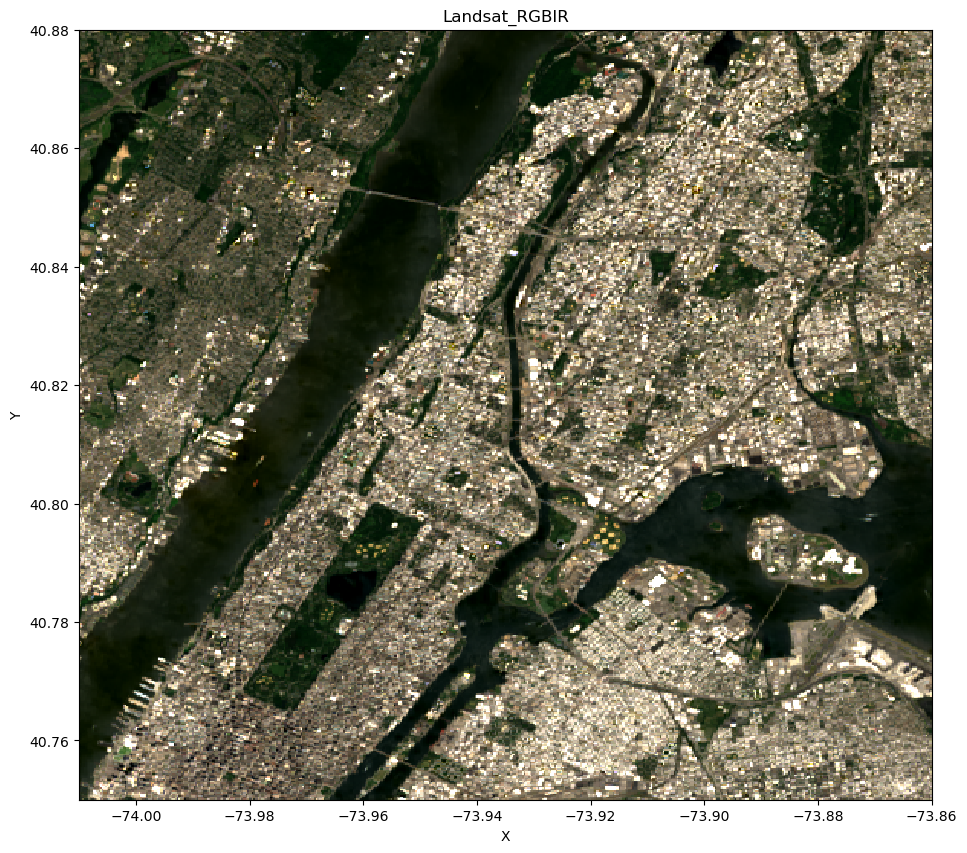

In [27]:
rgbir = rxr.open_rasterio("Landsat_RGBIR.tiff", masked=True).squeeze()

# Plot the loaded data
plt.figure(figsize=(11, 10))
rgbir[[0,1,2]].plot.imshow(robust=True)
plt.title('Landsat_RGBIR')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()